## Часть 1. Гауссовы квадратуры

Метод Гауссовых квадратур является одним из методов численного интегрирования, который позволяет увеличить точность интегрирования, используя ортогональные полиномы и их корни в качестве узлов.

$$
\int_a^b \!  w(x)\, f(x)\, dx \approx \sum_{k=1}^n w_k \, f(x_k) \;,
$$

здесь $\omega$ - функция весов, которая определят базис ортогональных полиномов, чьи корни используются в качестве узлов интегрирования. Если функция $f(x)$ является полиномом, тогда такой метод интегрирования даст *точное* решение интеграла.

Например, давайте посчитаем следующий интеграл:

$$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx  \label{eq1}\tag{1}
$$

Здесь функция уже полиномиальна, поэтому возьмем весовую функцию $\omega(x) = 1$. Тогда вычисление интеграла сводится к сумме корней полинома, соответствующих весовой функции $\omega(x) = 1$. Например, здесь https://dlmf.nist.gov/18.3 вы можете увидеть, какой базис полиномов соответствует вашей весовой функции.

Заметим, что нашей соответствуют полиномы Лежандра. Теперь, зайдем в документацию https://docs.scipy.org/doc/scipy/reference/special.html#orthogonal-polynomials. Функция *roots_legendre* сразу же выдаст корни полиномов Лежандра, а также веса к их корням (для полиномов Лежандра все эти веса равны единице).

###  Задание 1.1

1. Посчитайте точное значение интеграла ([1](#mjx-eqn-eq1)) "руками". Сравните его с полученным численным значением.

In [1]:
a = -1
b = 1
c = [3, -3, -8, 7]
s = c[0]*(b - a)
for i in range(1,len(c)):
    s += c[i] * (b**(i+1) - a**(i+1)) / (i + 1)
print(s)

2. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), используя обычный метод интегрирования на равномерной сетке (например, написанный вами в week_6_calculus). Оцените количество узлов, необходимых для достижения относительной точности $10^{-10}$.

In [2]:
import numpy as np

In [3]:
def midpoint_rule(func, a, b, eps):
    answer = np.inf
    integral = (b - a) * func((b - a) / 2)
    n = 1
    while abs(integral - answer) > eps:
        answer = integral
        n = n * 2
        d = (b - a) / n
        x = np.linspace(a + d * 0.5, b - d * 0.5, n)
        
        integral = sum([func(i) * d for i in x])
    return integral, n

In [4]:
c = [3, -3, -8, 7]

f = lambda x: sum([c[i] * x**i for i in range(len(c))])

In [5]:
print(midpoint_rule(f, -1, 1, 1e-10))

(0.6666666666860299, 524288)


3. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), используя корни полинома Лежандра степени от 1 до 6 в качестве узлов (чтобы получить корни и веса используйте scipy.special.roots_legendre)

In [6]:
import scipy.special

s = 0
for n in range(1, 6 + 1):
    x, w = scipy.special.roots_legendre(n)
    s = sum([w[i] * f(x[i]) for i in range(len(x))])
    print(s)

6.0
0.6666666666666665
0.6666666666666634
0.6666666666666674
0.6666666666666687
0.6666666666666693


Сравните количество узлов, необходимых для достижения одинаковой точности в обоих чисенных методах.

(20% итоговой оценки)

In [7]:
from math import log

eps = 1e-10
print(midpoint_rule(f, -1, 1, eps)[1], 'число точек для первого пособа')
n = 0
s = np.inf
while abs(s - 2/3) > eps:
    n += 1
    x, w = scipy.special.roots_legendre(n)
    s = sum([w[i] * f(x[i]) for i in range(len(x))])
print(len(x), 'число точек для второго способа')

524288 число точек для первого пособа
2 число точек для второго способа


###  Задание 1.2

Вычислите значение того же интеграла, но на интервале от 0 до 10.

$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx 
$$

Заметим, что больше нельзя использовать полиномы Лежанда, потому что они определены на интервале (-1, 1). Однако всегда можно произвести *аффинное преобразование* (преобразование не меняет область интегрирования) для того, чтобы перейти к желаемой системе координат.

(20% итоговой оценки)

In [8]:
c = [3, -3, -8, 7]

f_new = lambda x: 5 * sum([c[i] * ((x + 1) * 5)**i for i in range(len(c))])
n = 3
x, w = scipy.special.roots_legendre(n)
s_l = sum([w[i] * f_new(x[i]) for i in range(len(x))])
print(s_l, 'ответ через полиномы Лежандра')

a = 0
b = 10
c = [3, -3, -8, 7]
s = c[0]*(b - a)
for i in range(1,len(c)):
    s += c[i] * (b**(i+1) - a**(i+1)) / (i + 1)
print(s, 'ответ на интеграл, посчитанный явно')

14713.333333333332 ответ через полиномы Лежандра
14713.333333333334 ответ на интеграл, посчитанный явно


Сравните результат с точным значением интеграла.

In [9]:
print(abs(s - s_l), 'Ошибка интегрирования')

1.8189894035458565e-12 Ошибка интегрирования


### Задание 1.3

Вычислите значение следующиего интеграла:
$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}}
$$
используя соответствующий базис ортогональных полиномов.
Найдите степень полинома (количество узлов), при которой точность превысит ошибку плавающей точки.

(20% итоговой оценки)

In [10]:
f = lambda x: np.cos(2*np.pi*x) / np.pi * 0.25


n = 1
delta_old = np.inf
delta_new = delta_old

x, w = scipy.special.roots_chebyt(n)
res = sum([w[i] * f(x[i]) for i in range(len(x))])

while delta_new <= delta_old:
        n += 1
        delta_old = delta_new
        x, w = scipy.special.roots_chebyt(n)
        s_l = sum([w[i] * f(x[i]) for i in range(len(x))])
        delta_new = abs(res - s_l)
        res = s_l

print(res, n)

0.055069227134983585 18


## Часть 2. Уравение Фредгольма

Существует два типа уравнений Фредгольма: 

1. Уравение Фредгольма первого рода:
$$
\int_a^b \! K(x, t)\, \color{blue}{f(t)} \,dt = g(x)
$$

2. Уравнение Фредгольма второго рода:
$$
\lambda \int_a^b\! K(x, t)\, \color{blue}{f(t)} \, dt + g(x) = \color{blue}{f(x)}
$$

Здесь функция $f(x)$ неизвестна, $K(x, t)$ - ядро уравнения, заданная функция $g(x)$ и $\lambda$ - рациональное число.
С точки зрения вычислений, уравение Фредгольма первого рода крайне неустойчиво. Далее мы рассмотрим только уравнение второго рода.

Основная идея - аппроксимировать интеграл некой квадратурной формулой

$$
\int_a^b \! \xi(t)\, dt \approx \sum_j^N w_j\, \xi(t_j)
$$

с подходящими весами $w_j$ и узлами $t_j$, $j=1, \dots, N$. Точность аппроксимации контролируется $N$.

Таким образом, уравнение Фредгольма приближается следующим образом:

$$
\lambda \sum_j w_j\, K(x, t_j)\, \color{blue}{f(t_j)} + g(x) = \color{blue}{f(x)}
$$

Отметим, что $x$ - непрерывная переменная, в то время, как $t$ - дискретная.

Оценивая данное уравнение на сетке $x = t_k$, получаем

$$
\lambda \sum_j w_j \, K_{k, j}\, \color{blue}{f_j} + g_k = \color{blue}{f_k}
$$

где $f_j \equiv f(t_j)$, $g_j \equiv g(t_j)$ and $K_{k, j} \equiv K(t_k, t_j)$. Это ничто иное, как система линейных алгебраических уравнений на вектор $\color{blue}{f_j}$.

Ее решение выдает значение неизвестной функции $f(x)$ в дискретных точках $x=t_j$ для $j=1, \dots, N$.

### Задание 2.1

Решите предложенное уравнение Фредгольма второго рода

$$
f(x) = \sin(\pi x)  + \frac{1}{2} \int_0^1\! f(t) \, dt
$$

Здесь $a, b = 0, 1$, $\lambda = \dfrac{1}{2}$, ядро $K(x, t) = 1$ и правая часть - $g(x) = \sin(\pi x)$.

Точное решение (Сборник задач по интегральным уравнениям, 2006, стр. 5):

$$
f(x) = \sin(\pi x) + \frac{2}{\pi}
$$

Для нахождения интеграла воспользуйтесь Гауссовой квадратурой с весовой функцией $w(x) = 1$ на $(0, 1)$. Посмотрите на http://dlmf.nist.gov/18.3, и найдите соответствующую функцию в *scipy.special* (обратите внимание на область интегрирования).

Сравните полученные значения функции с точным решением для разных значений $N$. На каком $N$ можно остановиться?

(20% итоговой оценки)

In [76]:


lam = 0.5

for n in range(1, 15):
    x, w = scipy.special.roots_sh_legendre(n)

    k = np.ones(n)
    k.shape = (n, 1)
    w.shape = (1,n)

    F = np.linalg.solve(np.eye(n) - lam*k@w, np.sin(np.pi * x))

    print( np.linalg.norm(np.sin(x*np.pi) + 2/ np.pi - F), '- число шагов', n)

0.3633802276324185 - число шагов 1
0.02889134205974216 - число шагов 2
0.0007657482051929123 - число шагов 3
1.004047565394961e-05 - число шагов 4
7.849635643883314e-08 - число шагов 5
4.075690888101765e-10 - число шагов 6
1.5066630835619936e-12 - число шагов 7
2.6967223568632722e-15 - число шагов 8
3.6821932062951477e-16 - число шагов 9
2.4924445086331347e-15 - число шагов 10
4.2998752849492583e-16 - число шагов 11
2.3048828947687888e-15 - число шагов 12
1.8544380573903915e-15 - число шагов 13
7.691850745534255e-16 - число шагов 14


Бешеная точность уже на 5 шаге, а на 8 шаге уже нет смысла увеличивать число точек

### Задание 2.2

Очевидной проблемой предыдущего результата для $f(x)$ является то, что он возвращает решения на фиксированном наборе точек. Мы не контролируем их точное расположение.

1. Для начала, попробуйте интерполировать значения, полученные в предыдущем пункте на равномерной сетке длиной 50. Можете использовать любой метод интерполяции. Сравните интерполяцию с точным значением.

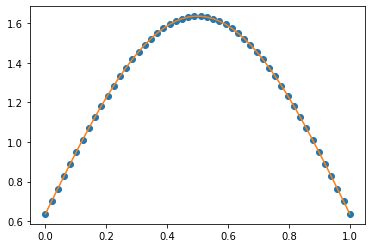

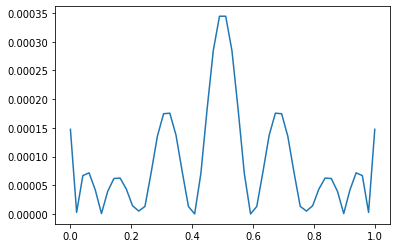

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate


xp = np.linspace(0, 1, 50)

n = 8
x, w = scipy.special.roots_sh_legendre(n)
k = np.ones(n)
k.shape = (n, 1)
w.shape = (1,n)

F = np.linalg.solve(np.eye(n) - lam*k@w, np.sin(np.pi * x))

F1 = interpolate.CubicSpline(x, F)  #интерполирующая функция

plt.figure()
plt.plot(xp, F1(xp), 'o')
plt.plot(xp, np.sin(xp*np.pi) + 2/ np.pi)
plt.show()

plt.figure()
plt.plot(xp, abs(F1(xp) - np.sin(xp*np.pi) - 2/ np.pi))
plt.show()

2. Теперь используйте следующую формулу, чтобы вычислить значение функции на той же равномерной сетке.

$$
f(x) = g(x) + \lambda \sum_j^N w_j\, K(x, t_j)\, f(t_j)
$$

Сравните эту интерполяцию с точным значением, а также с прямым интерполяционным методом.

(20% итогой оценки)

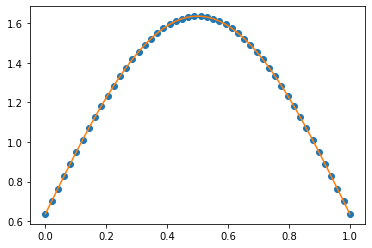

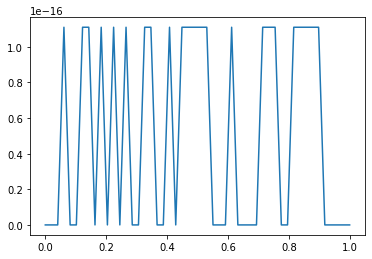

In [153]:
n = 9

x, w = scipy.special.roots_sh_legendre(n)
k = np.ones(n)

k.shape = (n, 1)
w.shape = (1,n)

F = np.linalg.solve(np.eye(n) - lam*k@w, np.sin(np.pi * x))
F.shape = (1,n)
CONST = np.linalg.norm(w @ F.T * 0.5)
F2 = lambda xp: np.sin(np.pi * xp) + CONST

xp = np.linspace(0, 1, 50)

plt.figure()
plt.plot(xp, F2(xp), 'o')
plt.plot(xp, np.sin(xp*np.pi) + 2/ np.pi)
plt.show()

plt.figure()
plt.plot(xp, abs(F2(xp) - np.sin(xp*np.pi) - 2/ np.pi))
plt.show()

Вообще маленькая погрешность, порядка 1е-16